In [1]:
import numpy as np
from data_read import read_obs
import time
from analysis_utils import plot_actual_data, run_sbi, bar_plot
import matplotlib.pyplot as plt
import os
import copy

In [2]:
all_labels = ['Aud Delay (ms)',
          'Somat Delay (ms)',
          'Fb Noise Var (log)',
          'Fb Noise Ratio (Aud:Som)',
          'Controller Gain']

train = True

path = os.path.join(os.getcwd(),'SBI_results_LD')
if not os.path.exists(path): os.mkdir(path)

In [3]:
observation_list = []
    
#observation_list.append(read_obs('pitch_pert_data/CA_Data/','CA','jh','control',"#C7221F"))
#observation_list.append(read_obs('pitch_pert_data/CA_Data/','CA','jh','patient',"#456990"))
observation_list.append(read_obs('pitch_pert_data/LD_Data/','LD','hk','control',"#C7221F"))
observation_list.append(read_obs('pitch_pert_data/LD_Data/','LD','hk','patient',"#456990"))

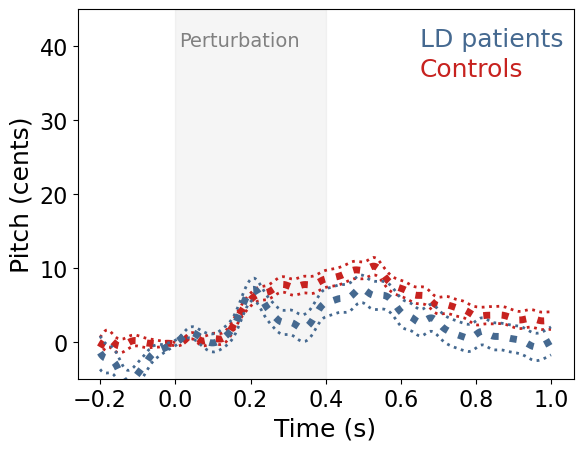

In [4]:
plot_actual_data(observation_list,xlabel='Time (s)',ylabel='Pitch (cents)',legend=True,show_pert=True,alpha=1)
plt.savefig('actual_data.pdf')

In [5]:
n_simulations = 500000
n_samples = 10000
n_reps = 1
rmse_means_all = np.ndarray([len(all_labels)+1,len(observation_list)])
rmse_stderr_all = np.ndarray([len(all_labels)+1,len(observation_list)])
prior_min_all = [50, 3, -10, 0.05, 0.05] 
prior_max_all = [200, 75, -1, 20, 20]

In [6]:
inferred_values, rmse_means, rmse_stderr = run_sbi(path,'all_params',observation_list,n_simulations,n_samples,n_reps,prior_min_all,prior_max_all,all_labels,train=train)
inferred_control_values = inferred_values[:,0]
rmse_means_all[0,:] = rmse_means
rmse_stderr_all[0,:] = rmse_stderr

Running 500000 simulations in 500000 batches.:   0%|          | 0/500000 [00:00<?, ?it/s]

In [11]:
print(('Inferred values:'))
for i, obs in enumerate(observation_list):
    print('\n\t' + obs.get('name') + "\n")
    for j, label in enumerate(all_labels):
        print('\t' + label + ": " + str(inferred_values[j,i]))
print('RMSE: \n')
for i, obs in enumerate(observation_list):
    print('\t' + obs.get('name') + ": " + "{:.2f}".format(rmse_means[i]) + " +/- " + "{:.2f}".format(rmse_stderr[i]))

Inferred values:

	Controls

	Aud Delay (ms): 115.64286422729492
	Somat Delay (ms): 31.32542610168457
	Fb Noise Var (log): -5.346447229385376
	Fb Noise Ratio (Aud:Som): 3.200521945953369
	Controller Gain: 4.8841729164123535

	CA patients

	Aud Delay (ms): 111.2153205871582
	Somat Delay (ms): 33.05725288391113
	Fb Noise Var (log): -5.824339866638184
	Fb Noise Ratio (Aud:Som): 2.1542595624923706
	Controller Gain: 5.394201040267944
RMSE: 

	Controls: 4.29 +/- 0.00
	CA patients: 8.01 +/- 0.00


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]


***Ablate Aud Delay (ms)***

Inferred values:

	Controls

	Somat Delay (ms): 29.369626998901367
	Fb Noise Var (log): -5.520344018936157
	Fb Noise Ratio (Aud:Som): 3.1208313703536987
	Controller Gain: 4.102899551391602

	CA patients

	Somat Delay (ms): 26.412260055541992
	Fb Noise Var (log): -5.920558452606201
	Fb Noise Ratio (Aud:Som): 2.2321327924728394
	Controller Gain: 5.481669902801514
RMSE: 

	Controls: 3.11 +/- 0.00
	CA patients: 7.53 +/- 0.00


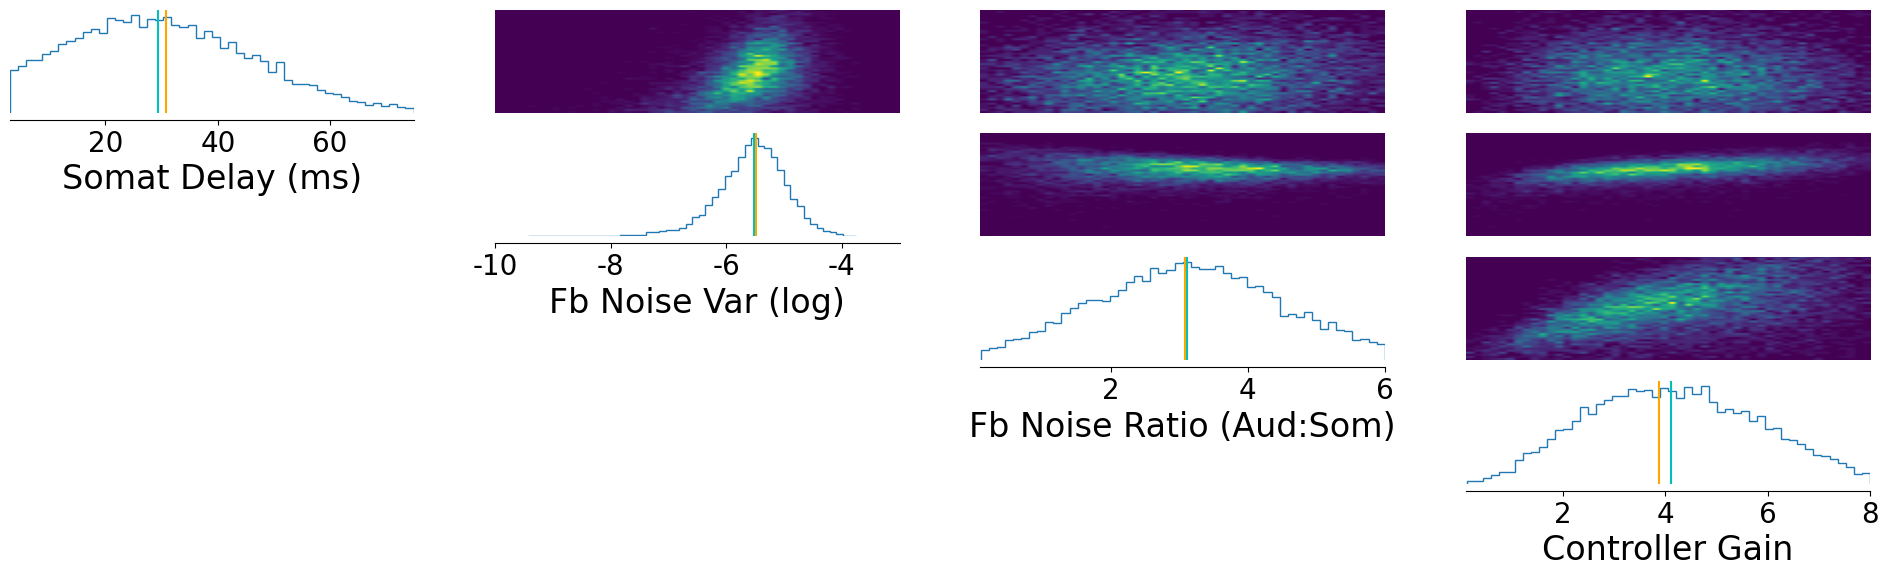

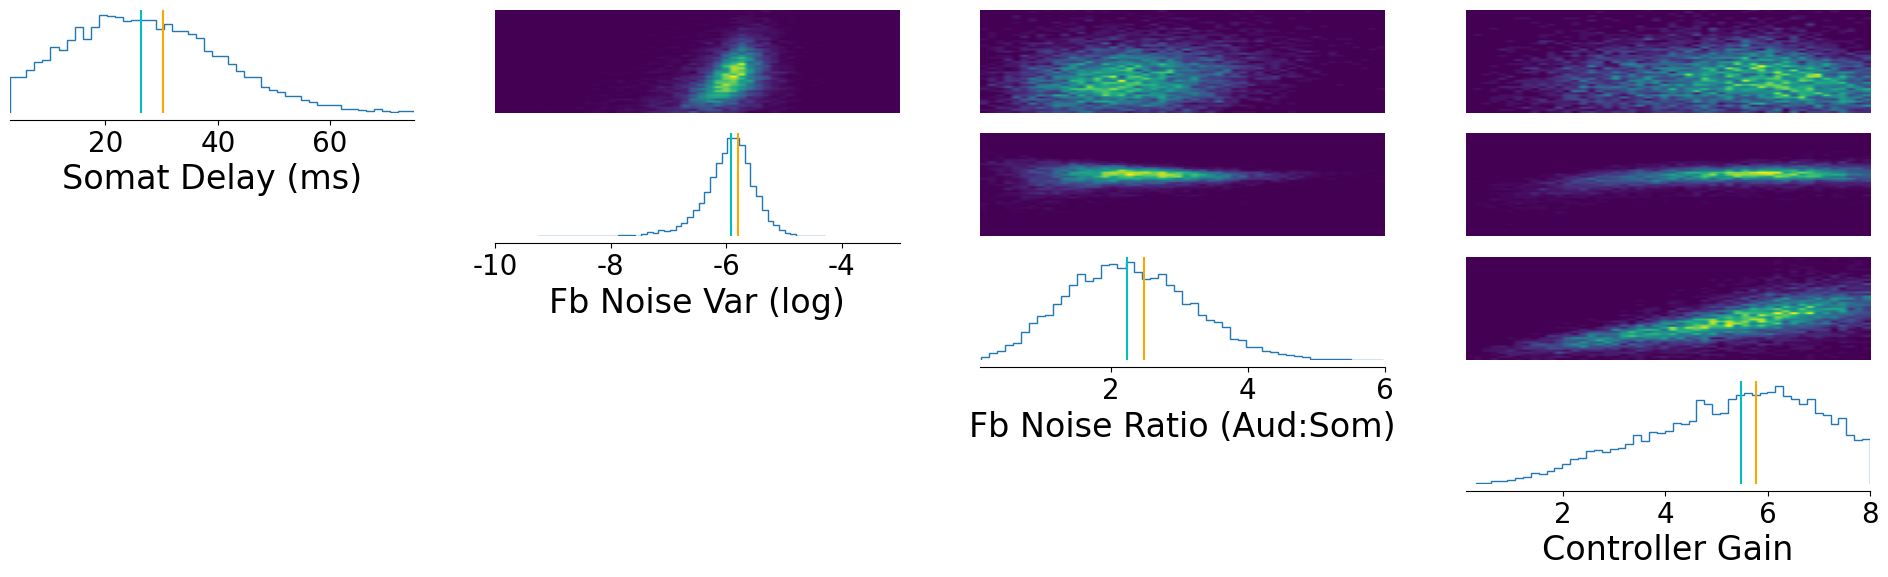

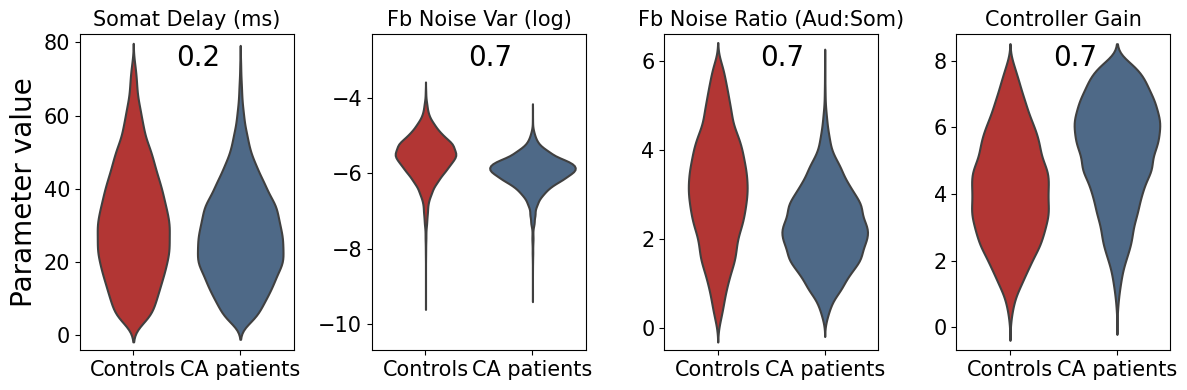

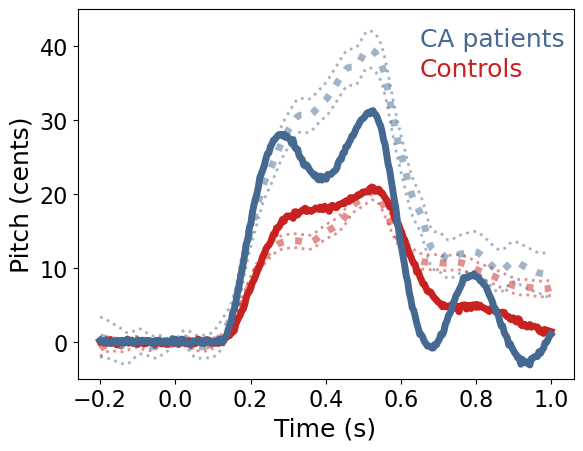

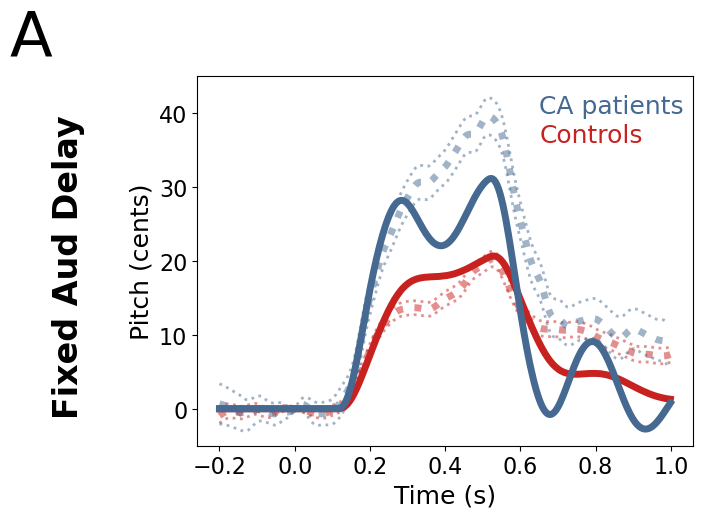

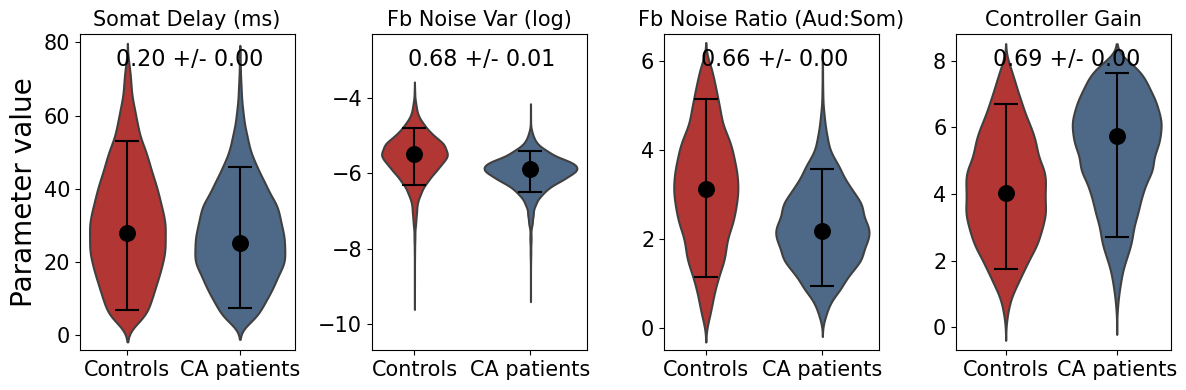

In [14]:
###ABLATION STUDY###
def run_sbi_ablation(ablation_index):
    label = all_labels[ablation_index]
    label = label.split('(')[0]
    label = label.strip()
    inferred_values, rmse_means, rmse_stderr = run_sbi(path,'Fix ' + label,observation_list,n_simulations,n_samples,n_reps,prior_min_all,prior_max_all,all_labels,train=train,ablate_index=ablation_index,ablate_values=inferred_control_values)
    rmse_means_all[ablation_index+1,:] = rmse_means
    rmse_stderr_all[ablation_index+1,:] = rmse_stderr
    labels = copy.deepcopy(all_labels)
    del labels[ablation_index]
    
    print('\n***Ablate ' + all_labels[ablation_index] + '***\n')
    print('Inferred values:')
    for i, obs in enumerate(observation_list):
        print('\n\t' + obs.get('name') + "\n")
        for j, label in enumerate(labels):
            print('\t' + label + ": " + str(inferred_values[j,i]))
    print('RMSE: \n')
    for i, obs in enumerate(observation_list):
        print('\t' + obs.get('name') + ": " + "{:.2f}".format(rmse_means[i]) + " +/- " + "{:.2f}".format(rmse_stderr[i]))
        
run_sbi_ablation(0)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]


***Ablate Somat Delay (ms)***

Inferred values:

	Controls

	Aud Delay (ms): 114.59856796264648
	Fb Noise Var (log): -5.415866374969482
	Fb Noise Ratio (Aud:Som): 3.100679636001587
	Controller Gain: 4.944636106491089

	CA patients

	Aud Delay (ms): 105.37783432006836
	Fb Noise Var (log): -5.732372045516968
	Fb Noise Ratio (Aud:Som): 2.03549063205719
	Controller Gain: 5.788943290710449
RMSE: 

	Controls: 4.45 +/- 0.00
	CA patients: 8.39 +/- 0.00


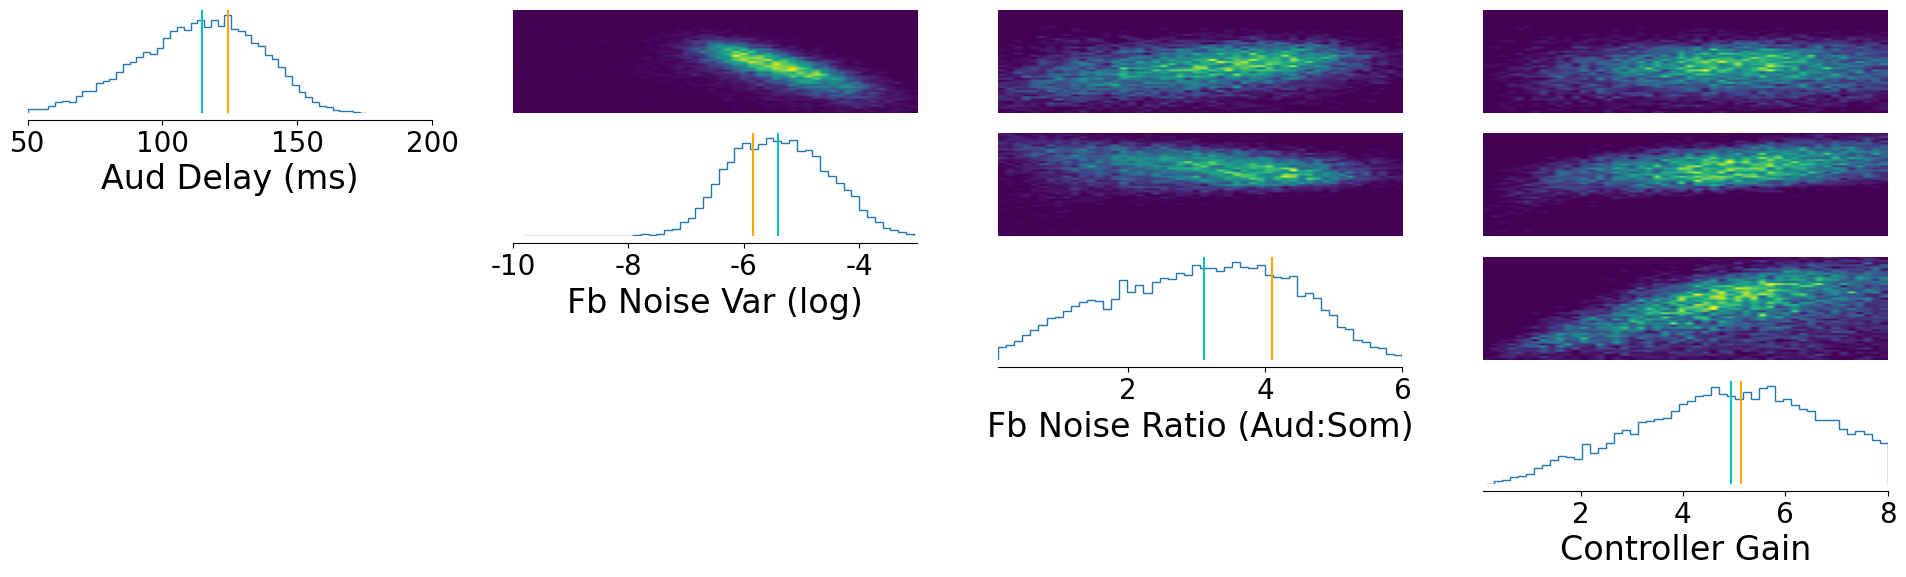

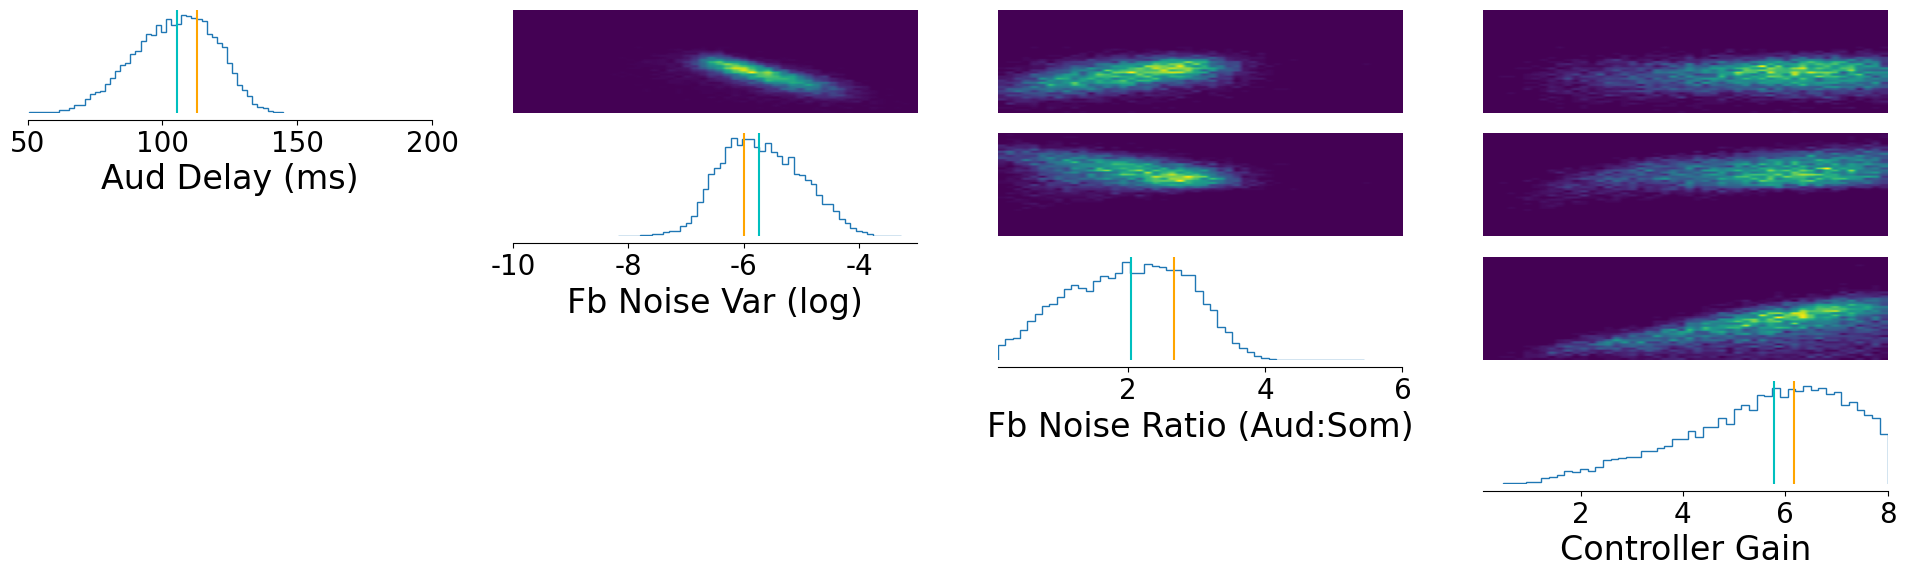

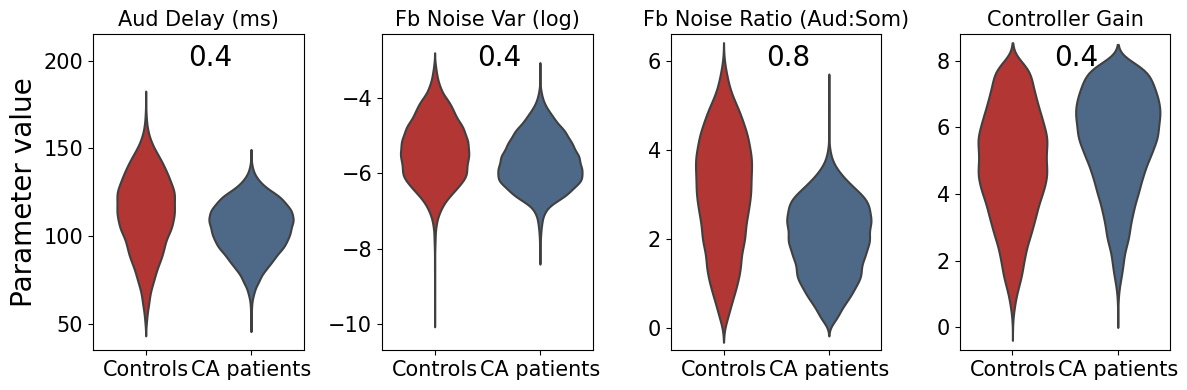

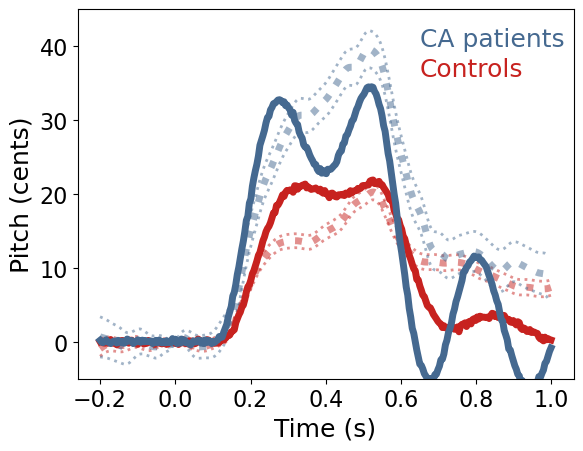

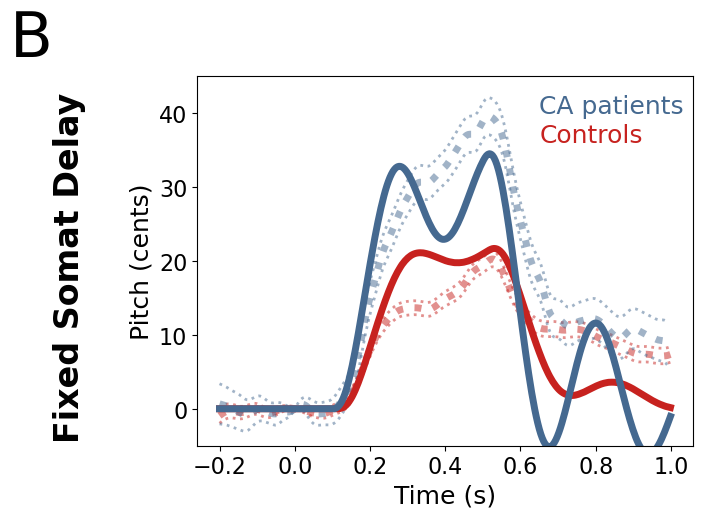

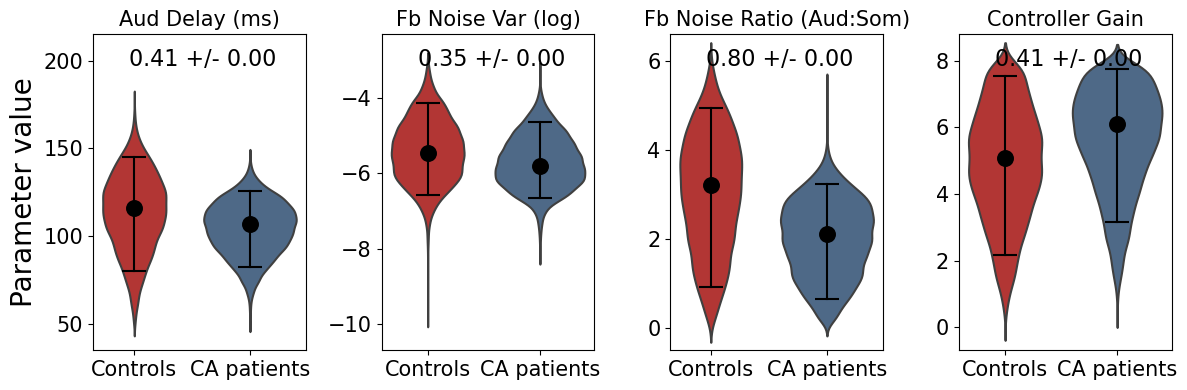

In [15]:
run_sbi_ablation(1)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]


***Ablate Fb Noise Var (log)***

Inferred values:

	Controls

	Aud Delay (ms): 119.57472229003906
	Somat Delay (ms): 17.433439254760742
	Fb Noise Ratio (Aud:Som): 3.308709979057312
	Controller Gain: 3.5067906379699707

	CA patients

	Aud Delay (ms): 115.04105377197266
	Somat Delay (ms): 6.646757125854492
	Fb Noise Ratio (Aud:Som): 1.3372297286987305
	Controller Gain: 3.8028249740600586
RMSE: 

	Controls: 2.55 +/- 0.00
	CA patients: 3.95 +/- 0.00


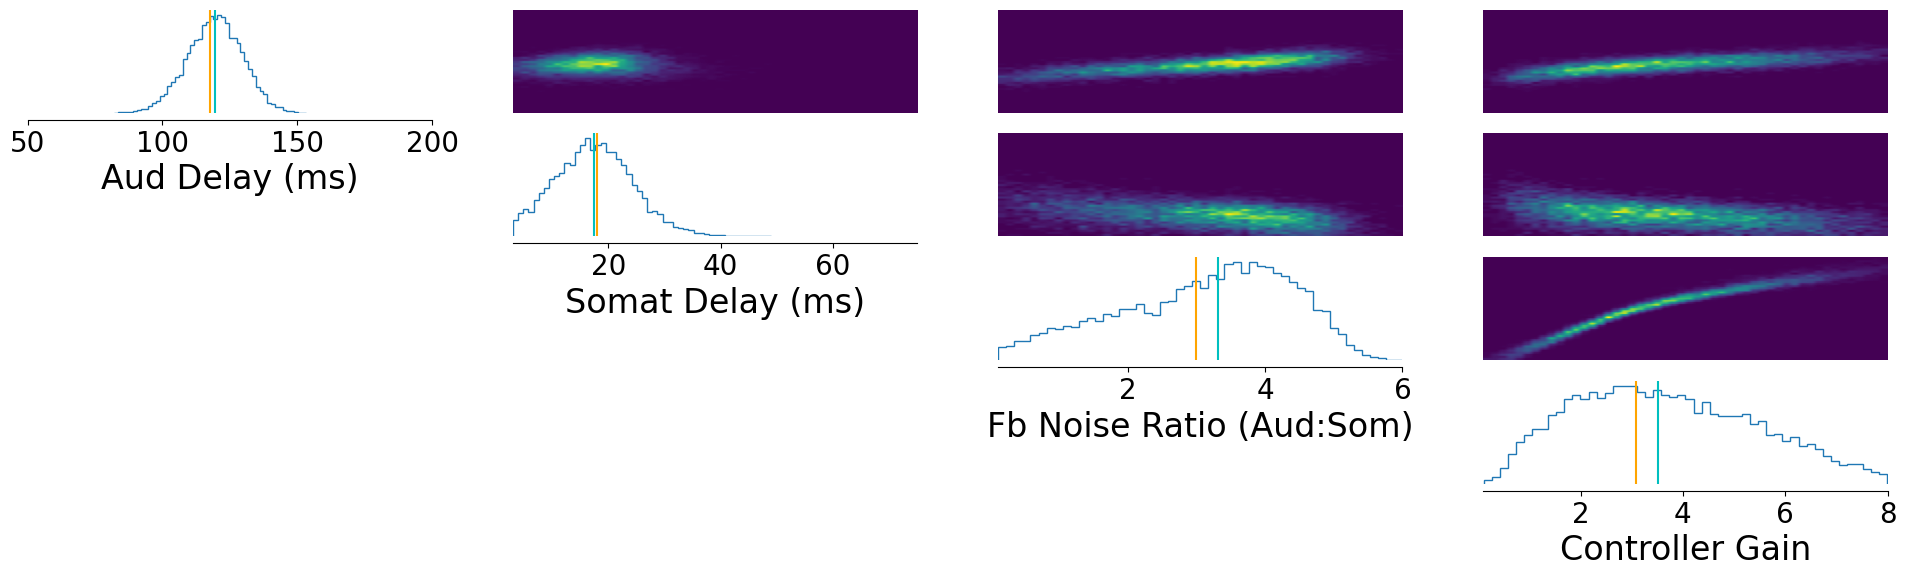

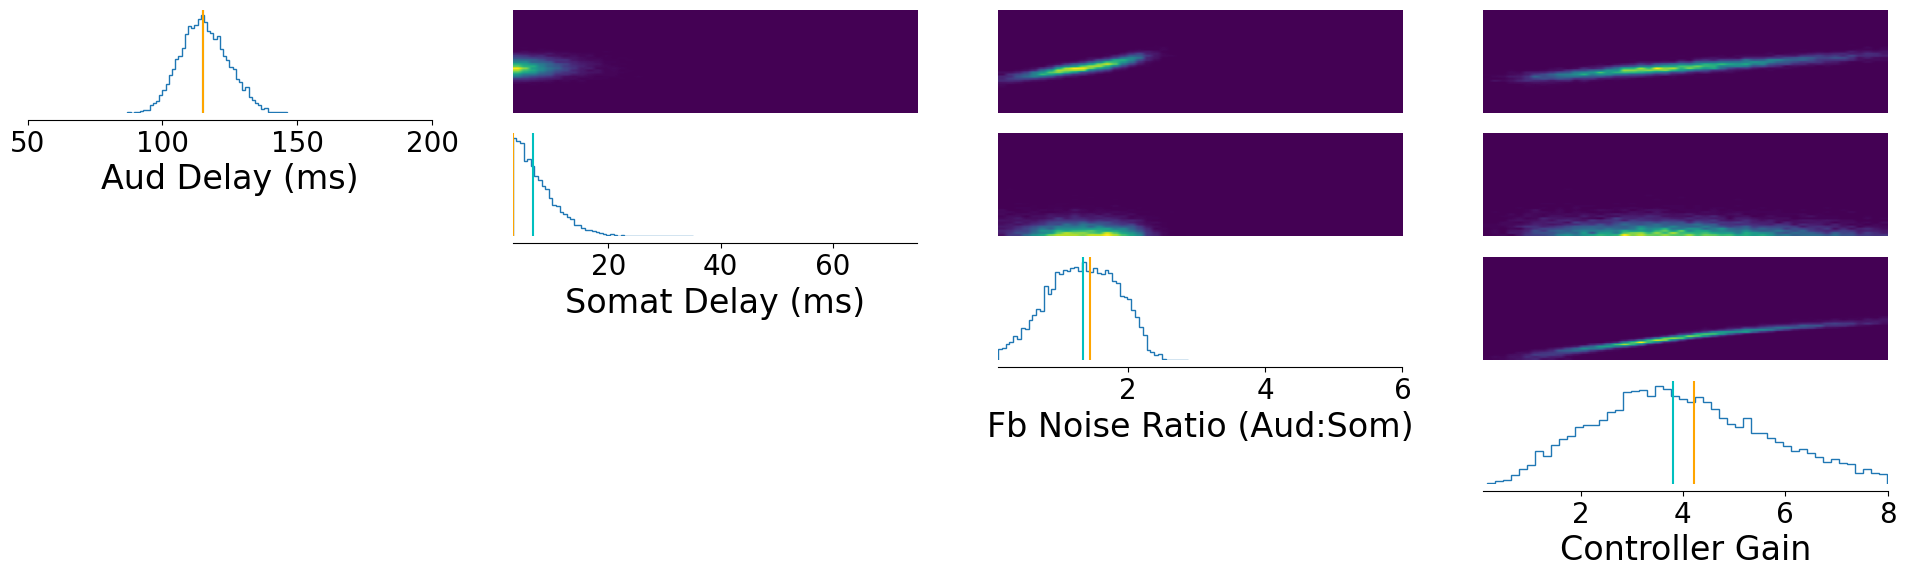

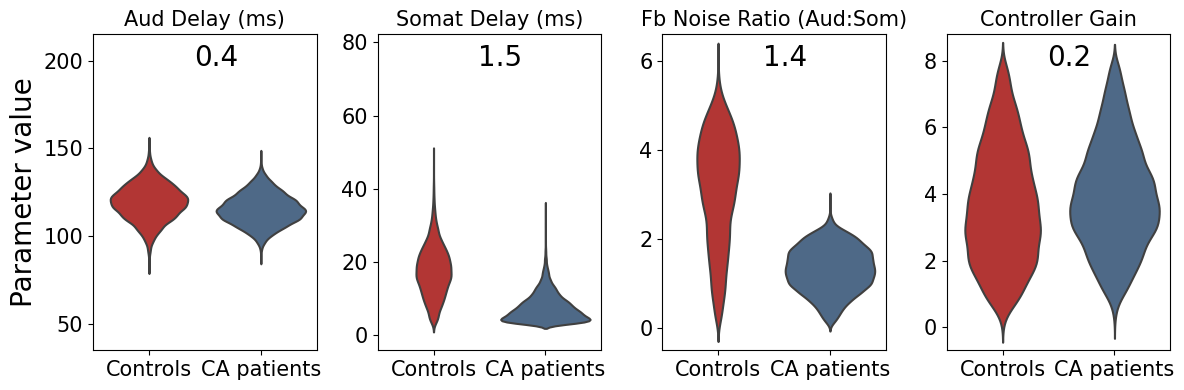

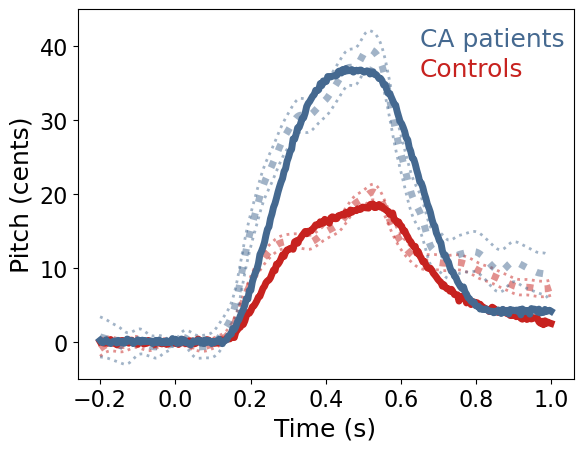

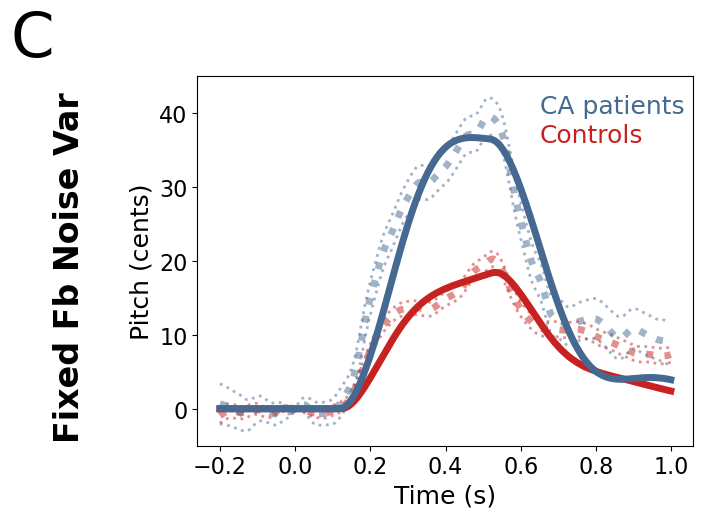

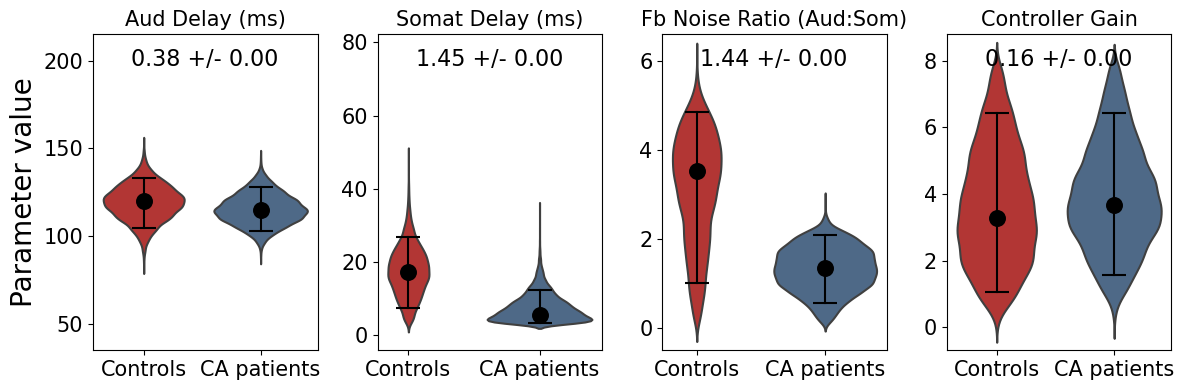

In [16]:
run_sbi_ablation(2)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]


***Ablate Fb Noise Ratio (Aud:Som)***

Inferred values:

	Controls

	Aud Delay (ms): 107.56932067871094
	Somat Delay (ms): 29.241673469543457
	Fb Noise Var (log): -5.369390487670898
	Controller Gain: 2.97211754322052

	CA patients

	Aud Delay (ms): 107.58527755737305
	Somat Delay (ms): 30.85525608062744
	Fb Noise Var (log): -5.702375888824463
	Controller Gain: 5.354349851608276
RMSE: 

	Controls: 2.12 +/- 0.00
	CA patients: 9.62 +/- 0.00


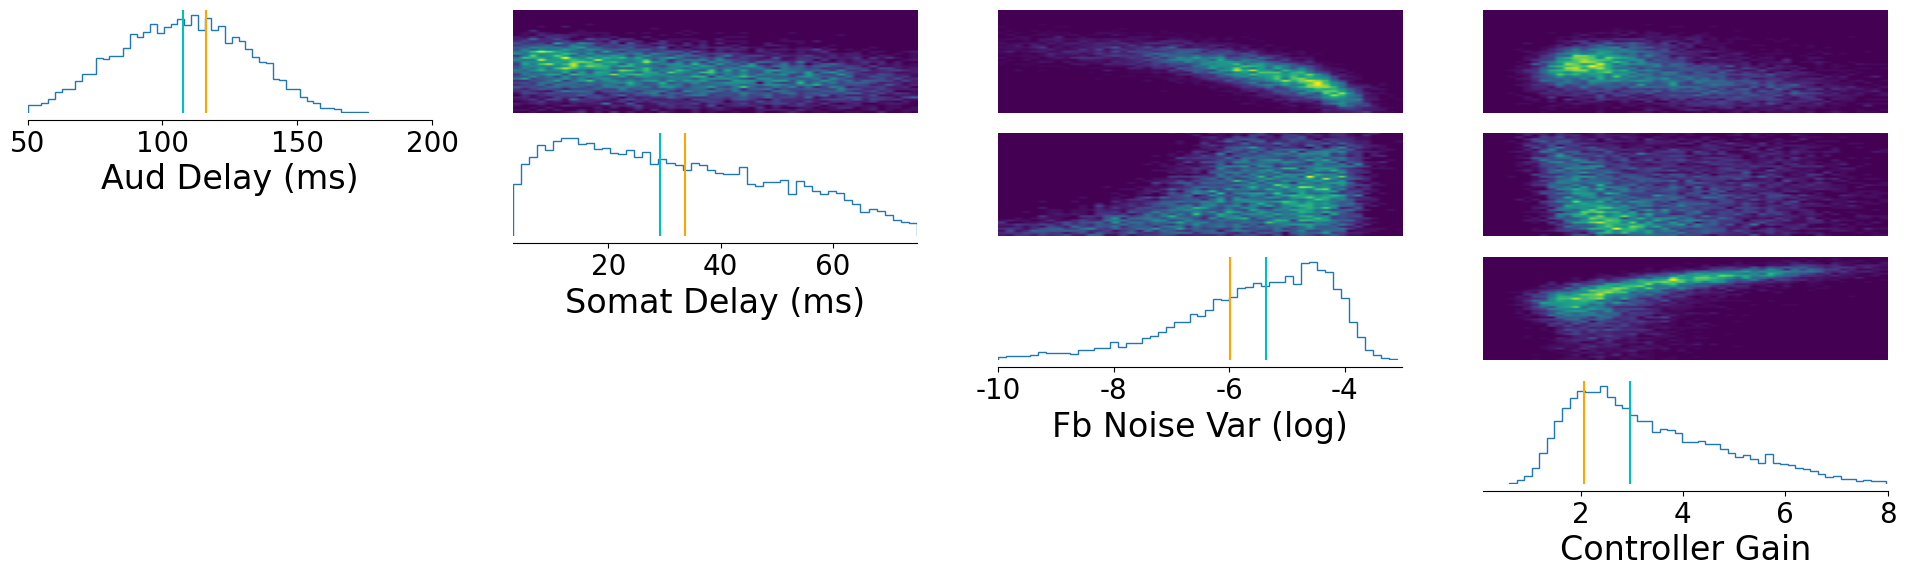

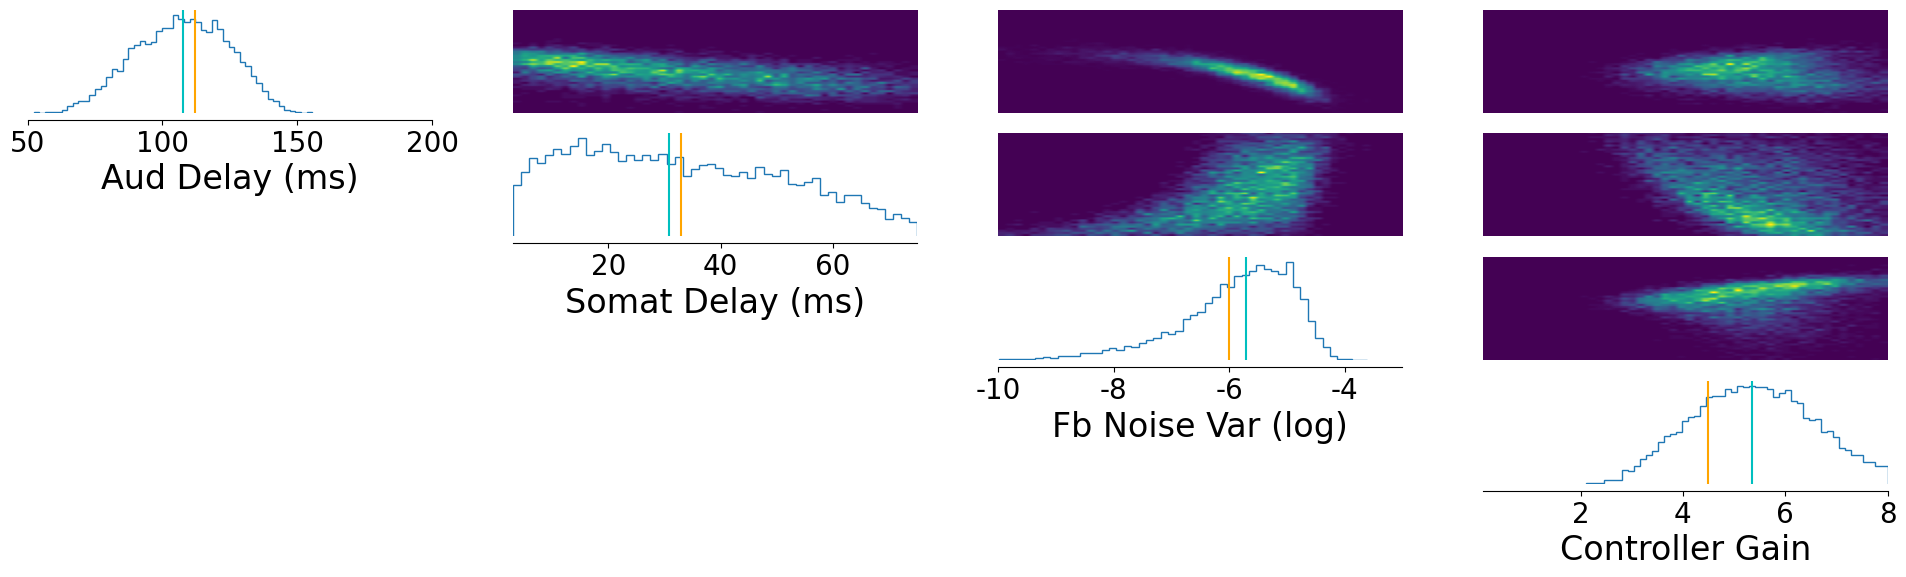

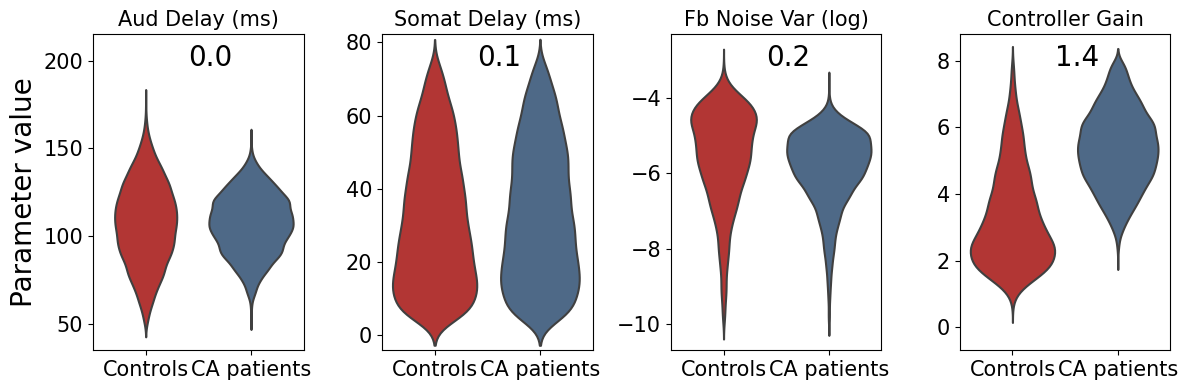

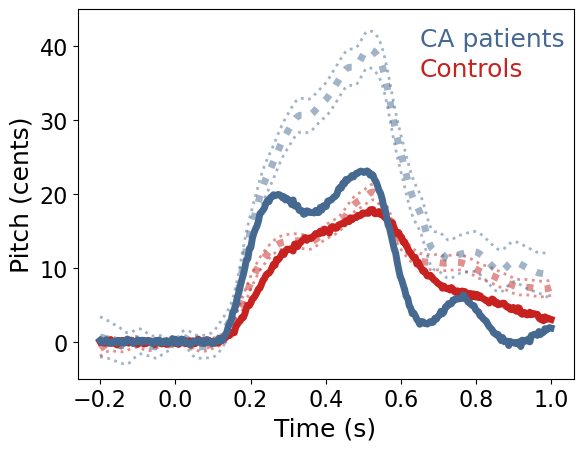

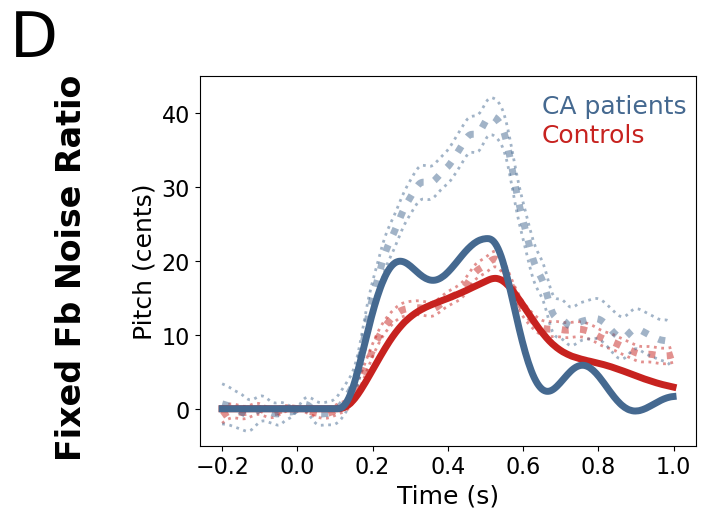

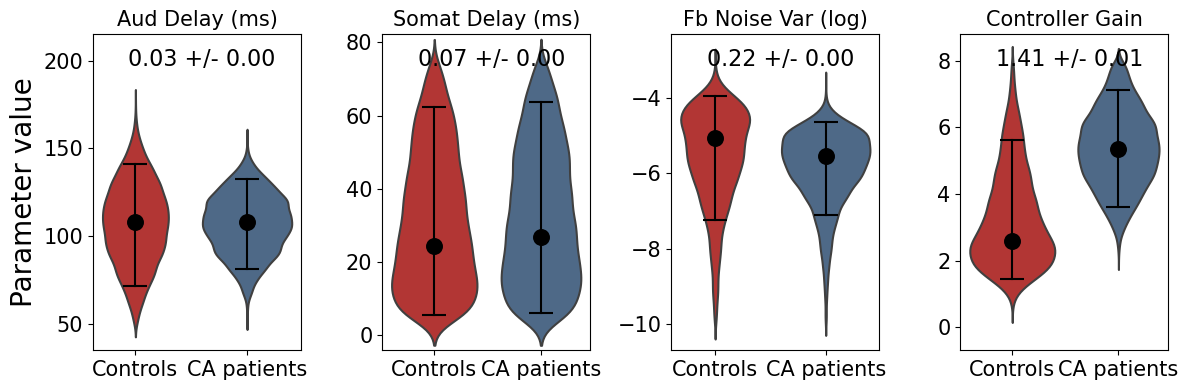

In [17]:
run_sbi_ablation(3)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]


***Ablate Controller Gain***

Inferred values:

	Controls

	Aud Delay (ms): 106.00139617919922
	Somat Delay (ms): 31.25815200805664
	Fb Noise Var (log): -5.78662633895874
	Fb Noise Ratio (Aud:Som): 2.1331719160079956

	CA patients

	Aud Delay (ms): 107.11518859863281
	Somat Delay (ms): 33.256460189819336
	Fb Noise Var (log): -6.246513366699219
	Fb Noise Ratio (Aud:Som): 0.9038123488426208
RMSE: 

	Controls: 7.29 +/- 0.00
	CA patients: 79.11 +/- 0.00


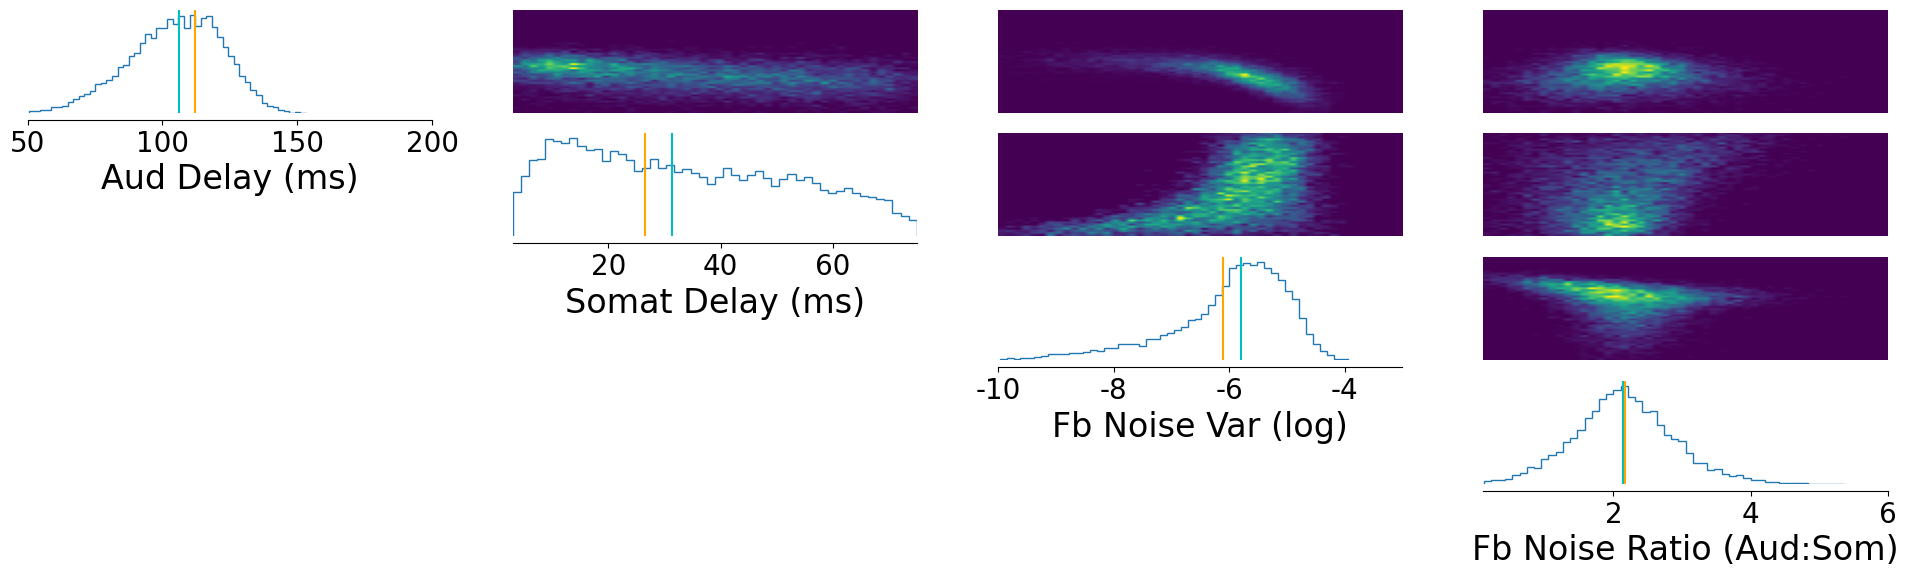

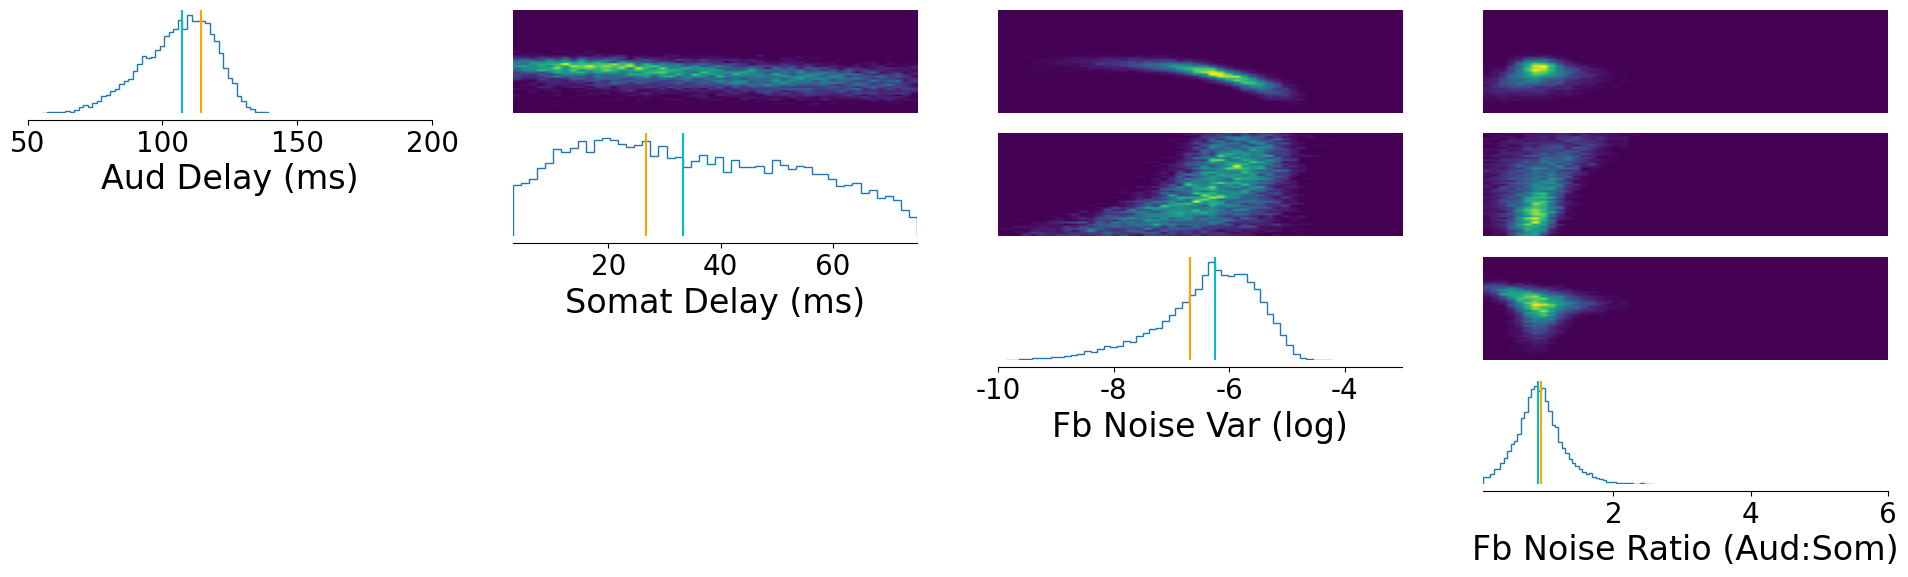

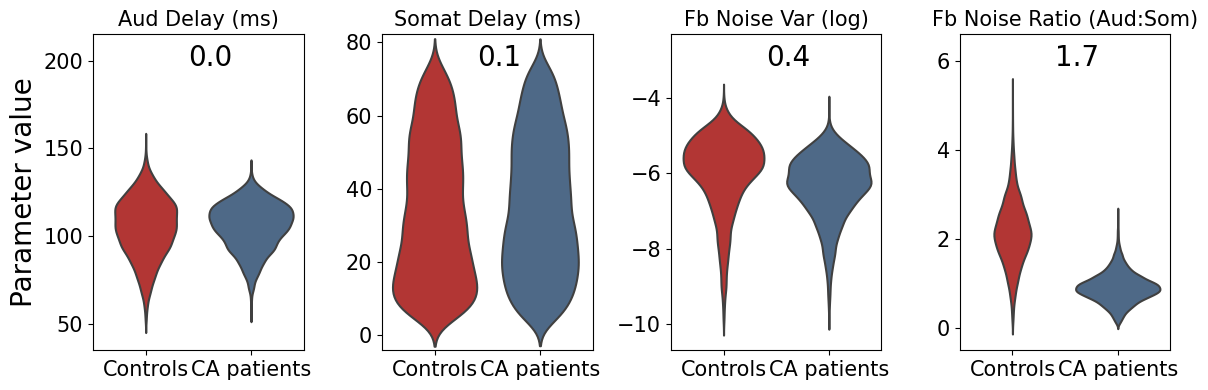

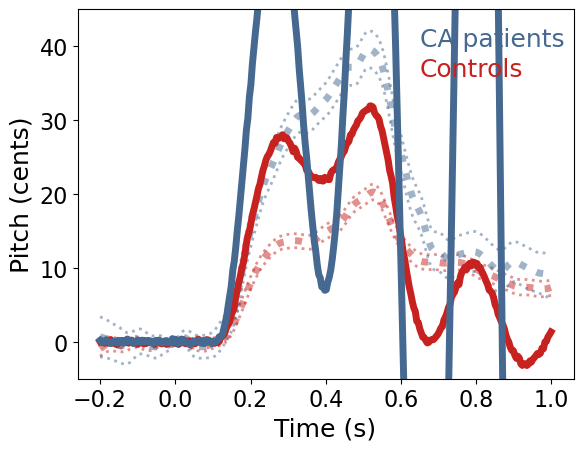

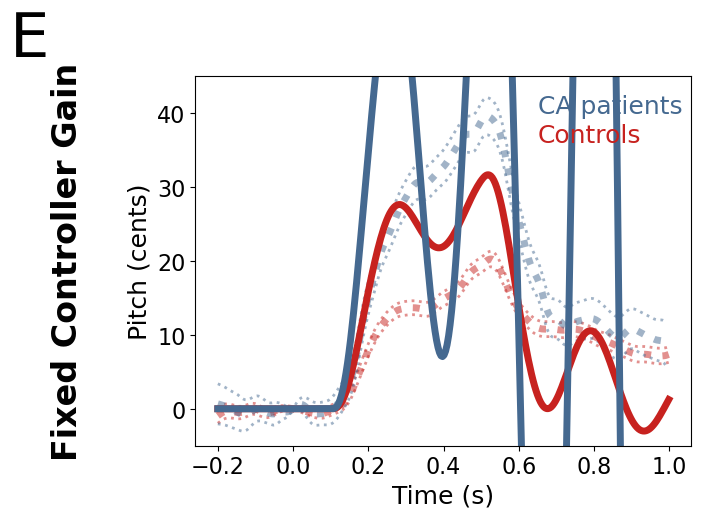

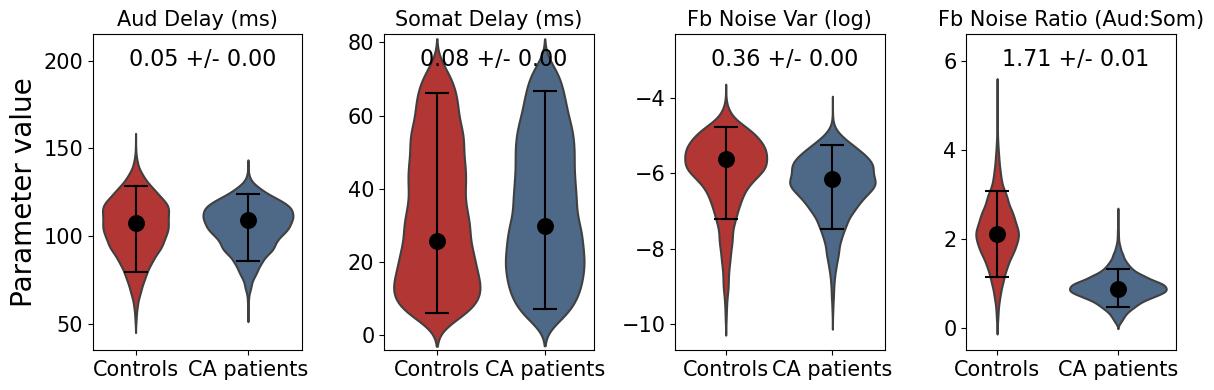

In [18]:
run_sbi_ablation(4)

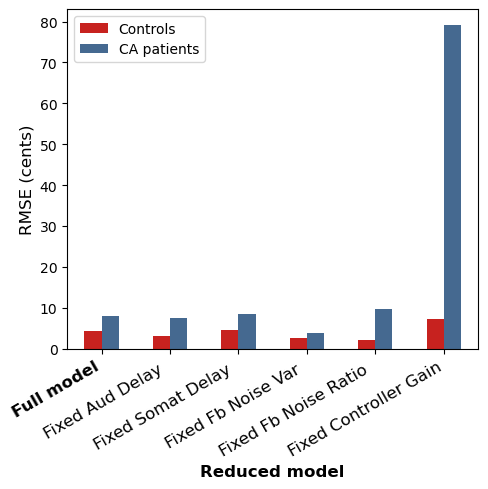

In [19]:
labels = copy.deepcopy(all_labels)
labels = ['Fixed ' + label for label in labels]
labels = [label.split('(')[0] for label in labels]
labels.insert(0,'Full model')
    
bar_plot(rmse_means_all,rmse_stderr_all,observation_list,labels)
plt.savefig(os.path.join(path,'bar_plot.png'))